# **Employee Earnings and Salary Analysis**

# ◆ Introduction

This project uses the City Employee Earnings Dataset sourced from Data.gov (United States Government), which contains detailed earnings information for public employees in Philadelphia. The dataset includes all categories of employees—such as elected officials, civil service staff, and court personnel—and provides quarterly records from 2019 to 2025, covering base salary, gross pay components, job titles, department assignments, and employment categories.

The purpose of this analysis is to derive meaningful insights into salary patterns, departmental variations, and compensation trends. By applying data cleaning, transformation, and analytical techniques, this project aims to provide a clear understanding of how employee earnings differ across job titles, departments, and employment categories. The findings will support informed decision-making and contribute to improved transparency in public compensation systems.

# ◆ Objectives

1. To analyze earnings patterns of public employees in Philadelphia using quarterly data from 2019–2025.

2. To compare salary, overtime, and gross pay variations across different departments and job titles.

3. To examine differences in compensation between employment categories such as Civil Service, part-time, temporary, and salaried employees.

4. To identify trends and fluctuations in employee earnings across multiple calendar years and quarters.

5. To generate actionable insights that help understand workforce compensation structure and financial distribution.

# ◆  Data Loading and Initial Overview

The dataset is imported using **Pandas** for data handling, with **NumPy** supporting numerical operations and **Seaborn/Matplotlib** used for visual exploration. An initial overview is performed to check the dataset size, column data types, and basic statistics. Functions like **head()**, **info()**, and **describe()** help identify missing values and understand the overall structure of the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
import pandas as pd
df = pd.read_csv("employee_earnings.csv")
df

,cartodb_id,objectid,calendar_year,quarter,last_name,first_name,title,job_code,department_name,department_number,...,overtime_gross_pay_qtd,base_gross_pay_qtd,longevity_gross_pay_qtd,post_separation_gross_pay_qtd,miscellaneous_gross_pay_qtd,employee_category,compulsory_union_code,termination_month,termination_year,public_id
0,1,2972571,2023,4,Guess,Monte,Deputy Sheriff Captain,6K06,SHF Sheriff,70,...,NaN,-5.199695e+04,-93.09,NaN,1.400000e+03,Civil Service,B,NaN,NaN,34277
1,2,2972572,2022,4,Massi Jr,John,Police Sergeant,6A04,PPD Police,11,...,NaN,-5.101207e+04,-4067.88,NaN,-4.036470e+03,Civil Service,P,NaN,NaN,20121
2,3,2972573,2022,4,Guess,Monte,Deputy Sheriff Captain,6K06,SHF Sheriff,70,...,NaN,-3.107869e+04,-3698.42,NaN,0.000000e+00,Civil Service,B,NaN,NaN,34277
3,4,2972574,2019,4,Timms,James,Police Officer 1,6A02,PPD Police,11,...,NaN,-2.857851e+04,-1725.40,NaN,-1.716090e+03,Civil Service,P,6.0,2016.0,36785
4,5,2972575,2022,3,Mcquilkin,Charles,Firefighter,6B01,PFD Fire,13,...,10636.58,-2.847237e+04,-940.08,NaN,4.304877e+04,Civil Service,F,NaN,NaN,28977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808648,808649,3781219,2025,3,Saeed,Atif,Chief Executive Officer,C138,PHL Dept of Aviation,92,...,NaN,1.060165e+05,NaN,NaN,0.000000e+00,Exempt,E,NaN,NaN,42108
808649,808650,3781220,2024,4,Eburuoh,Rita,Medical Care Clinical Director (Hourly),4N08,DPH Health,14,...,NaN,1.074585e+05,NaN,NaN,0.000000e+00,Civil Service,N,NaN,NaN,34500
808650,808651,3781221,2025,2,Johnson,Sarah,Medical Services Director (Hourly),4N09,DPH Health,14,...,NaN,1.075847e+05,NaN,NaN,0.000000e+00,Civil Service,N,NaN,NaN,5323
808651,808652,3781222,2024,2,Cherian,Julie,Physician (Hourly),4N06,DPH Health,14,...,NaN,1.281699e+05,NaN,NaN,0.000000e+00,Civil Service,J,NaN,NaN,20366


In [ ]:
# Dataset shape
df.shape

(808653, 22)

In [ ]:
# Data types
df.dtypes

cartodb_id                         int64
objectid                           int64
calendar_year                      int64
quarter                            int64
last_name                         object
first_name                        object
title                             object
job_code                          object
department_name                   object
department_number                  int64
base_salary                      float64
salary_type                       object
overtime_gross_pay_qtd           float64
base_gross_pay_qtd               float64
longevity_gross_pay_qtd          float64
post_separation_gross_pay_qtd    float64
miscellaneous_gross_pay_qtd      float64
employee_category                 object
compulsory_union_code             object
termination_month                float64
termination_year                 float64
public_id                          int64
dtype: object

In [ ]:
# First 5 rows
df.head(5)

,cartodb_id,objectid,calendar_year,quarter,last_name,first_name,title,job_code,department_name,department_number,...,overtime_gross_pay_qtd,base_gross_pay_qtd,longevity_gross_pay_qtd,post_separation_gross_pay_qtd,miscellaneous_gross_pay_qtd,employee_category,compulsory_union_code,termination_month,termination_year,public_id
0,1,2972571,2023,4,Guess,Monte,Deputy Sheriff Captain,6K06,SHF Sheriff,70,...,NaN,-51996.95,-93.09,NaN,1400.00,Civil Service,B,NaN,NaN,34277
1,2,2972572,2022,4,Massi Jr,John,Police Sergeant,6A04,PPD Police,11,...,NaN,-51012.07,-4067.88,NaN,-4036.47,Civil Service,P,NaN,NaN,20121
2,3,2972573,2022,4,Guess,Monte,Deputy Sheriff Captain,6K06,SHF Sheriff,70,...,NaN,-31078.69,-3698.42,NaN,0.00,Civil Service,B,NaN,NaN,34277
3,4,2972574,2019,4,Timms,James,Police Officer 1,6A02,PPD Police,11,...,NaN,-28578.51,-1725.40,NaN,-1716.09,Civil Service,P,6.0,2016.0,36785
4,5,2972575,2022,3,Mcquilkin,Charles,Firefighter,6B01,PFD Fire,13,...,10636.58,-28472.37,-940.08,NaN,43048.77,Civil Service,F,NaN,NaN,28977


In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808653 entries, 0 to 808652
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   cartodb_id                     808653 non-null  int64  
 1   objectid                       808653 non-null  int64  
 2   calendar_year                  808653 non-null  int64  
 3   quarter                        808653 non-null  int64  
 4   last_name                      808653 non-null  object 
 5   first_name                     808653 non-null  object 
 6   title                          808653 non-null  object 
 7   job_code                       808653 non-null  object 
 8   department_name                808653 non-null  object 
 9   department_number              808653 non-null  int64  
 10  base_salary                    767743 non-null  float64
 11  salary_type                    808647 non-null  object 
 12  overtime_gross_pay_qtd        

In [ ]:
# Statistical summary
df.describe()

,cartodb_id,objectid,calendar_year,quarter,department_number,base_salary,overtime_gross_pay_qtd,base_gross_pay_qtd,longevity_gross_pay_qtd,post_separation_gross_pay_qtd,miscellaneous_gross_pay_qtd,termination_month,termination_year,public_id
count,808653.000000,8.086530e+05,808653.000000,808653.000000,808653.000000,767743.000000,413863.000000,8.086530e+05,520379.000000,11697.000000,8.086530e+05,39816.000000,39816.000000,808653.000000
mean,404327.000000,3.376897e+06,2021.989994,2.506004,27.287625,67045.874467,4681.156638,1.493573e+04,765.178126,16721.636170,7.116342e+02,6.483800,2020.183142,21709.972322
std,233438.157953,2.334382e+05,1.931301,1.077237,23.785935,25407.225467,5565.555129,2.737296e+05,735.528247,34032.844559,2.735591e+05,3.355542,0.902931,13196.291714
min,1.000000,2.972571e+06,2019.000000,1.000000,1.000000,9920.000000,-15194.320000,-5.199695e+04,-4067.880000,-544503.370000,-2.459861e+08,1.000000,2016.000000,1.000000
25%,202164.000000,3.174734e+06,2020.000000,2.000000,11.000000,47448.000000,903.160000,9.727500e+03,220.430000,1154.950000,0.000000e+00,3.000000,2020.000000,10543.000000
50%,404327.000000,3.376897e+06,2022.000000,3.000000,15.000000,65712.000000,2751.890000,1.431330e+04,401.520000,5109.580000,1.440000e+01,7.000000,2020.000000,21177.000000
75%,606490.000000,3.579060e+06,2024.000000,3.000000,28.000000,83048.000000,6409.010000,2.006520e+04,1216.830000,18175.870000,1.190160e+03,9.000000,2021.000000,31889.000000
max,808653.000000,3.781223e+06,2025.000000,4.000000,92.000000,475404.800000,67446.050000,2.460640e+08,7450.750000,792030.430000,5.737701e+05,12.000000,2022.000000,54923.000000


# ◆  Data Pre-processing

# 1. Handle Missing Values

In [ ]:
# Count missing values
df.isnull().sum()

cartodb_id                            0
objectid                              0
calendar_year                         0
quarter                               0
last_name                             0
first_name                            0
title                                 0
job_code                              0
department_name                       0
department_number                     0
base_salary                       40910
salary_type                           6
overtime_gross_pay_qtd           394790
base_gross_pay_qtd                    0
longevity_gross_pay_qtd          288274
post_separation_gross_pay_qtd    796956
miscellaneous_gross_pay_qtd           0
employee_category                     0
compulsory_union_code                74
termination_month                768837
termination_year                 768837
public_id                             0
dtype: int64

In [ ]:
# Replace blanks in base_salary with 0
# convert empty strings to NaN
df["base_salary"] = df["base_salary"].replace("", np.nan)

# fill NaN with 0
df["base_salary"] = df["base_salary"].fillna(0)


In [ ]:
# Filter rows where salary_type is blank ("", NaN, or 'Unknown')
filtered_df = df[df["salary_type"].fillna("").str.strip() == ""]

# Show only Base Salary and Salary Type columns
result = filtered_df[["department_name","base_salary", "salary_type"]]

result


,department_name,base_salary,salary_type
23421,MOE Mayors Office of Education,0.0,NaN
25595,FLP Free Library of Phila,0.0,NaN
26638,PWD Water,0.0,NaN
92932,PPR Parks and Recreation,0.0,NaN
128772,PPS Prisons,0.0,NaN
141851,PPR Parks and Recreation,0.0,NaN


In [ ]:
# Replace blank , salary_type with "Non-Salaried"
df["salary_type"] = df["salary_type"].replace([""], pd.NA)
df["salary_type"] = df["salary_type"].fillna("Non-Salaried")


In [ ]:
# Replace null values with 0 in the selected columns
Replace_gross_qtd = ["overtime_gross_pay_qtd","longevity_gross_pay_qtd","post_separation_gross_pay_qtd","compulsory_union_code"]
df[Replace_gross_qtd] = df[Replace_gross_qtd].fillna(0)

In [ ]:
#Handling Null Values in Termination Columns
df["termination_month"] = df["termination_month"].fillna("Active")
df["termination_year"] = df["termination_year"].fillna("Active")

Many employees do not have termination details (because they are still working), the termination_month and termination_year columns contain null values. These null values were replaced with the text "Not Terminated" to clearly indicate active employees and avoid missing data issues during analysis.

In [ ]:
df.isnull().sum()

cartodb_id                       0
objectid                         0
calendar_year                    0
quarter                          0
last_name                        0
first_name                       0
title                            0
job_code                         0
department_name                  0
department_number                0
base_salary                      0
salary_type                      0
overtime_gross_pay_qtd           0
base_gross_pay_qtd               0
longevity_gross_pay_qtd          0
post_separation_gross_pay_qtd    0
miscellaneous_gross_pay_qtd      0
employee_category                0
compulsory_union_code            0
termination_month                0
termination_year                 0
public_id                        0
dtype: int64

# Handling Invalid Negative Salary Values

Since salary or QTD pay cannot logically be negative, all negative values were converted to their positive equivalents. These negative entries likely resulted from system reversals, adjustments, or data input errors. Converting them to positive values ensures that the dataset accurately reflects employee earnings and allows Total Earnings to be calculated consistently for more employees.

In [ ]:
# Handling Invalid Negative Salary Values
cols = [
    'overtime_gross_pay_qtd',
    'base_gross_pay_qtd',
    'longevity_gross_pay_qtd',
    'post_separation_gross_pay_qtd',
    'miscellaneous_gross_pay_qtd']


# Convert the selected columns to positive values
df[cols] = df[cols].abs()

# 2. Handle Duplicate Records

In [ ]:
# Check total duplicate rows
df.duplicated().sum()

# Remove Duplicate Rows
df = df.drop_duplicates()

# Confirm removal
df.duplicated().sum()

np.int64(0)

# 3. Create Derived Columns

In [ ]:
# Total Earnings = Base + Overtime + Longevity + Misc + Post Separation
df["total_qtd_earning"] = (
    df["base_gross_pay_qtd"] +
    df["overtime_gross_pay_qtd"] +
    df["longevity_gross_pay_qtd"] +
    df["miscellaneous_gross_pay_qtd"] +
    df["post_separation_gross_pay_qtd"])

# Extra pay excluding base salary
df['additional_earnings_qtd'] = (
    df['overtime_gross_pay_qtd'] +
    df['longevity_gross_pay_qtd'] +
    df['post_separation_gross_pay_qtd'] +
    df['miscellaneous_gross_pay_qtd'])



In [ ]:
# Earnings Difference (Base vs Actual)
df["earnings_diff"] = df["total_qtd_earning"] - df["base_gross_pay_qtd"]

# Overtime Percentage
df["overtime_percentage"] = (df["overtime_gross_pay_qtd"] / df["total_qtd_earning"]) * 100
df["overtime_percentage"] = df["overtime_percentage"].fillna(0)
df["overtime_percentage"] = (df["overtime_percentage"].astype(float).round(0).astype(int).astype(str) + "%")

In [ ]:
#Yearly Earnings Category classify employees into very Low,Low,Medium,High,Very High groups based on their total yearly earnings.

# Create yearly earnings
df["yearly_earning"] = df["total_qtd_earning"] * 4

# Create 5 categories using quantiles
df["earning_category"] = pd.qcut(
    df["yearly_earning"],
    q=5,
    labels=["Very Low", "Low", "Medium", "High", "Very High"])

In [ ]:
# Merge first_name and last_name into full_name
df["full_name"] = df["first_name"].astype(str) + " " + df["last_name"].astype(str)

In [ ]:
# Active vs Inactive Employee based on termination year.
df["active_status"] = "Inactive"
df.loc[df["termination_year"] == "Active", "active_status"] = "Active"

In [ ]:
# Show updated data
df[["full_name", "total_qtd_earning","additional_earnings_qtd","earnings_diff","overtime_percentage","yearly_earning","earning_category","active_status"]].head(5)


,full_name,total_qtd_earning,additional_earnings_qtd,earnings_diff,overtime_percentage,yearly_earning,earning_category,active_status
0,Monte Guess,53490.04,1493.09,1493.09,0%,213960.16,Very High,Active
1,John Massi Jr,59116.42,8104.35,8104.35,0%,236465.68,Very High,Active
2,Monte Guess,34777.11,3698.42,3698.42,0%,139108.44,Very High,Active
3,James Timms,32020.00,3441.49,3441.49,0%,128080.00,Very High,Inactive
4,Charles Mcquilkin,83097.80,54625.43,54625.43,13%,332391.20,Very High,Active


In [ ]:
# Count the active_status
df['active_status'].value_counts()

active_status
Active      768837
Inactive     39816
Name: count, dtype: int64

In [ ]:
# remove the column
col = df.pop("full_name")

# insert at index 4
df.insert(4, "full_name", col)

#Drop first name and last name
df = df.drop(["first_name", "last_name"], axis=1)

In [ ]:
df.head(5)

,cartodb_id,objectid,calendar_year,quarter,full_name,title,job_code,department_name,department_number,base_salary,...,termination_month,termination_year,public_id,total_qtd_earning,additional_earnings_qtd,earnings_diff,overtime_percentage,yearly_earning,earning_category,active_status
0,1,2972571,2023,4,Monte Guess,Deputy Sheriff Captain,6K06,SHF Sheriff,70,95557.0,...,Active,Active,34277,53490.04,1493.09,1493.09,0%,213960.16,Very High,Active
1,2,2972572,2022,4,John Massi Jr,Police Sergeant,6A04,PPD Police,11,94674.0,...,Active,Active,20121,59116.42,8104.35,8104.35,0%,236465.68,Very High,Active
2,3,2972573,2022,4,Monte Guess,Deputy Sheriff Captain,6K06,SHF Sheriff,70,92550.0,...,Active,Active,34277,34777.11,3698.42,3698.42,0%,139108.44,Very High,Active
3,4,2972574,2019,4,James Timms,Police Officer 1,6A02,PPD Police,11,73433.0,...,6.0,2016.0,36785,32020.00,3441.49,3441.49,0%,128080.00,Very High,Inactive
4,5,2972575,2022,3,Charles Mcquilkin,Firefighter,6B01,PFD Fire,13,83048.0,...,Active,Active,28977,83097.80,54625.43,54625.43,13%,332391.20,Very High,Active


# 4. Filter or Aggregate Data

In [ ]:
# Filter only full-time and Active employees
full_time_active = df[(df["salary_type"] == "Salaried") & (df["active_status"] == "Active")]
full_time_active

,cartodb_id,objectid,calendar_year,quarter,full_name,title,job_code,department_name,department_number,base_salary,...,termination_month,termination_year,public_id,total_qtd_earning,additional_earnings_qtd,earnings_diff,overtime_percentage,yearly_earning,earning_category,active_status
0,1,2972571,2023,4,Monte Guess,Deputy Sheriff Captain,6K06,SHF Sheriff,70,95557.0,...,Active,Active,34277,5.349004e+04,1.493090e+03,1.493090e+03,0%,2.139602e+05,Very High,Active
1,2,2972572,2022,4,John Massi Jr,Police Sergeant,6A04,PPD Police,11,94674.0,...,Active,Active,20121,5.911642e+04,8.104350e+03,8.104350e+03,0%,2.364657e+05,Very High,Active
2,3,2972573,2022,4,Monte Guess,Deputy Sheriff Captain,6K06,SHF Sheriff,70,92550.0,...,Active,Active,34277,3.477711e+04,3.698420e+03,3.698420e+03,0%,1.391084e+05,Very High,Active
4,5,2972575,2022,3,Charles Mcquilkin,Firefighter,6B01,PFD Fire,13,83048.0,...,Active,Active,28977,8.309780e+04,5.462543e+04,5.462543e+04,13%,3.323912e+05,Very High,Active
5,6,2972576,2022,4,Louis Feinberg,Tipstaff 1 (General),T251,FJD 1st Judicial District PA,84,43166.0,...,Active,Active,7403,4.974293e+04,3.057162e+04,3.057162e+04,0%,1.989717e+05,Very High,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808633,808634,3781204,2024,4,Adam Thiel,Managing Director,M120,MDO Managing Director Office,10,310000.0,...,Active,Active,11785,9.501935e+04,0.000000e+00,0.000000e+00,0%,3.800774e+05,Very High,Active
808639,808640,3781210,2024,2,Kevin Bethel,Deputy Mayor/Police Commissioner,D457,PPD Police,11,340000.0,...,Active,Active,47593,9.676991e+04,0.000000e+00,0.000000e+00,0%,3.870796e+05,Very High,Active
808640,808641,3781211,2023,4,Gregory Stewart,Chief Of County Detectives,C119,DAO District Attorney,69,150000.0,...,Active,Active,27937,1.036236e+05,6.554940e+03,6.554940e+03,0%,4.144944e+05,Very High,Active
808648,808649,3781219,2025,3,Atif Saeed,Chief Executive Officer,C138,PHL Dept of Aviation,92,386669.0,...,Active,Active,42108,1.060165e+05,0.000000e+00,0.000000e+00,0%,4.240661e+05,Very High,Active


In [ ]:
# Department-level Avg Salary
dept_salary = df.groupby("department_name")["base_salary"].mean().reset_index()
dept_salary

,department_name,base_salary
0,BBS Board of Buildng Standards,0.000000
1,BOE Board of Ethics,97352.540606
2,BPR Board of Pensions Retiremt,64543.828594
3,BRT Board of Revision of Taxes,48721.328554
4,CAO Ofc of Chief Admin Officer,55079.763460
5,CEO Community Empowerment Ofc,71106.163698
6,CHR Phila Comsn on Hum Relatns,51471.845576
7,CLR City Controller,76671.881461
8,CMS City Commissioners,43362.624632
9,COM Commerce,92490.817157


# ◆ Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) helps in understanding the structure, patterns, and relationships within the Philadelphia employee earnings dataset. The analysis includes univariate, bivariate, and multivariate exploration using Pandas, NumPy, Matplotlib, and Seaborn to identify major trends in employee salaries, department-level patterns, and earnings variations.

# 1. Univariate Analysis

Analyzes each column individually.
In this section, we analyze individual variables (one at a time) to understand their distributions, ranges, and central tendencies.
We focus on numeric columns like base_salary,total_qtd_earning and additional_earnings_qtd.


In [ ]:
# Numeric columns for univariate analysis
numeric_cols = ['base_salary','total_qtd_earning','additional_earnings_qtd']

print(df[numeric_cols].describe())


         base_salary  total_qtd_earning  additional_earnings_qtd
count  808653.000000       8.086530e+05             8.086530e+05
mean    63654.003387       1.939318e+04             4.456662e+03
std     28788.471548       5.472975e+05             2.736528e+05
min         0.000000       0.000000e+00             0.000000e+00
25%     45392.000000       1.076404e+04             1.436000e+02
50%     63499.000000       1.695883e+04             9.969200e+02
75%     82900.000000       2.543959e+04             5.604270e+03
max    475404.800000       4.920502e+08             2.459862e+08


Base salary ranges from 0 to 475,404, with a median of about 63,499.
Total QTD earnings vary widely, from 0 to extremely high values, showing a highly skewed distribution (mean ≈ 19,393 but max ≈ 492 million).
Additional earnings also show large variation, indicating that some employees receive high overtime or special payments, while most receive very small amounts (median ≈ 996).

In [ ]:
# Summary for Categorical columns
cat_cols = ['department_name', 'title', 'earning_category', 'active_status']

# Top 10 frequent categories
for col in cat_cols:
    print(df[col].value_counts().head(10))
    print("\n")

department_name
PPD Police                      194803
PFD Fire                         74287
STS Streets                      63092
FJD 1st Judicial District PA     62425
PWD Water                        58516
PPS Prisons                      43251
PPR Parks and Recreation         38428
DHS Dept of Human Services       36344
DPH Health                       24968
FLP Free Library of Phila        22737
Name: count, dtype: int64


title
Police Officer 1                   113811
Firefighter                         44215
Correctional Officer                34358
Laborer                             24489
School Crossing Guard               19748
Detective                           14807
Police Sergeant                     14526
Social Work Services Manager 2      13689
Assistant Managing Director 2       12324
Recreation Specialty Instructor     10873
Name: count, dtype: int64


earning_category
Very Low     161734
Very High    161731
Medium       161730
High         161730
Low          16

Department Distribution: Most employees work in PPD Police, followed by PFD Fire and STS Streets, indicating these are the city’s largest operational departments.

Top Job Titles: Police Officer 1, Firefighter, and Correctional Officer are the most common roles, showing a workforce heavily concentrated in public safety.

Earning Categories: A majority of employees fall under the Low earning group, with only a small share in the Medium and very few in the High earning category.

Employment Status: Most employees are currently Active, while a smaller fraction are marked as Inactive, based on termination details.

# 2. Bivariate Analysis

Relationships between two variables at a time, focusing on numeric-numeric, categorical-numeric, and categorical-categorical interactions. The goal is to detect patterns, trends, and differences among employee earnings.

**Numeric-Numeric Relationships**

Check relationships between numeric variables, e.g., base_salary, overtime_percentage, total_qtd_earning, additional_earnings_qtd, earnings_diff.

In [ ]:
# Correlation matrix for numeric columns
numeric_cols = ['base_salary', 'total_qtd_earning', 'additional_earnings_qtd', 'earnings_diff']
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

                         base_salary  total_qtd_earning  \
base_salary                 1.000000           0.028647   
total_qtd_earning           0.028647           1.000000   
additional_earnings_qtd     0.021348           0.999845   
earnings_diff               0.021348           0.999845   

                         additional_earnings_qtd  earnings_diff  
base_salary                             0.021348       0.021348  
total_qtd_earning                       0.999845       0.999845  
additional_earnings_qtd                 1.000000       1.000000  
earnings_diff                           1.000000       1.000000  


total_qtd_earning, additional_earnings_qtd, and earnings_diff all show very high correlation (≈ 1.0) with each other.
base_salary has a very weak correlation (~0.02–0.03) with these earning measures.

**Categorical-Numeric Relationships**

Examine how numeric variables differ across categories (department_name, title, earning_category).

In [ ]:
# Group by department
dept_salary = df.groupby('department_name')['base_salary'].agg(['mean','median','min','max','std'])
dept_salary = dept_salary.sort_values('mean', ascending=False)
print(dept_salary)

                                             mean    median      min  \
department_name                                                        
OAC Ofc Arts Culture Creative        98458.252500  81250.00  64675.8   
BOE Board of Ethics                  97352.540606  85775.81  47801.0   
COM Commerce                         92490.817157  85594.00  32081.0   
MOE Mayors Office of Education       88416.007253  72343.11      0.0   
OIG Ofc of Inspector General         86020.896640  79380.00  40000.0   
FIN Finance                          83705.006557  83048.00      0.0   
LAW Law Dept                         83584.662163  79310.00  30043.0   
OIT Ofc of Innovation and Tech       83103.051147  80155.51      0.0   
PFD Fire                             82997.489974  83048.00      0.0   
REP City Representative              79464.896429  58789.01  44970.0   
MOS Office of Sustainability         79137.360201  80000.00      0.0   
CTO City Treasurer                   79107.306667  71335.00     

It compares which departments have higher average salaries, which have large variations, and which departments have low or zero salaries (for temporary, hourly, or non-salaried roles).

#3. Multivariate Analysis

three or more variables simultaneously. This helps uncover complex patterns and interactions in City Employee Earnings dataset. We'll use groupby, pivot tables, and cross-tabulations to summarize these relationships in a report-friendly format (tables + insight).

**Base Salary by Department and Job Title**

In [ ]:
# Group by department and title
multivariate_salary = df.groupby(['department_name', 'title'])['base_salary'].agg(['mean','median','min','max'])
multivariate_salary = multivariate_salary.sort_values('mean', ascending=False)

# Show top 10 for report
print(multivariate_salary.head(10))

                                                                                  mean  \
department_name                     title                                                
DPH Health                          Assistant Medical Examiner (Hourly)  460597.511111   
PHL Dept of Aviation                Chief Executive Officer              347803.111111   
PPD Police                          Deputy Mayor/Police Commissioner     329327.000000   
DPH Health                          Medical Examiner                     309232.625000   
                                    Deputy Medical Examiner              279578.166667   
COM Commerce - Division of Aviation Chief Executive Officer              273430.147059   
MDO Managing Director Office        Director Of Public Safety            265000.000000   
MAY Mayor                           Director Of Public Safety            265000.000000   
PFD Fire                            Commissioner                         255000.000000   
DPH Health

Medical and executive positions in departments like Health, Aviation, Police, and Fire have the highest salary levels. For example, Assistant Medical Examiners and Chief Executive Officers show very high averages, indicating that these roles are the top earners in the dataset.

**Total QTD Earnings by Department, Job Title, and Earning Category**

In [ ]:
# Filter for top 10 titles
top_titles = df['title'].value_counts().head(10).index

# Pivot table: Total QTD earnings
pivot_multi = pd.pivot_table(df[df['title'].isin(top_titles)],
                             values='total_qtd_earning',
                             index=['department_name','title'],
                             columns='earning_category',
                             aggfunc='mean',
                             fill_value=0)
print(pivot_multi)

C:\Users\adris\AppData\Local\Temp\ipykernel_31796\2447804226.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_multi = pd.pivot_table(df[df['title'].isin(top_titles)],


earning_category                                                   Very Low  \
department_name                title                                          
CAO Ofc of Chief Admin Officer Assistant Managing Director 2    2017.500000   
DHS Dept of Human Services     Recreation Specialty Instructor  4923.542055   
                               Social Work Services Manager 2   5737.939612   
DPD Planning and Development   Assistant Managing Director 2       0.000000   
DPH Health                     Social Work Services Manager 2   5474.855000   
FIN Finance                    Correctional Officer             4212.749474   
                               Detective                        1088.912500   
                               Firefighter                      4003.077333   
                               Laborer                          4884.184125   
                               Police Officer 1                 2277.235274   
                               Police Sergeant      

The table shows how different job titles across departments earn on average, grouped into Very Low, Low, Medium, High, and Very High earning categories. Police, Fire, and Prisons jobs have higher earning values across most categories. Administrative and social-service roles generally show lower to medium earnings. Some titles (e.g., Assistant Managing Director 2) appear across many departments but show big differences in earnings depending on department. Very High earnings are mostly seen in Police, Fire, Prisons, where overtime and additional payments are high.

# ◆ Visualization

Using Matplotlib, Seaborn

🎯 **Distribution of Employees Across Departments**

Bar Chart – The bar chart displays the number of employees in each department. Each bar represents a department, and its height indicates how many employees belong to that department. This visualization helps identify the largest and smallest departments and provides a clear comparison of workforce distribution across the organization.

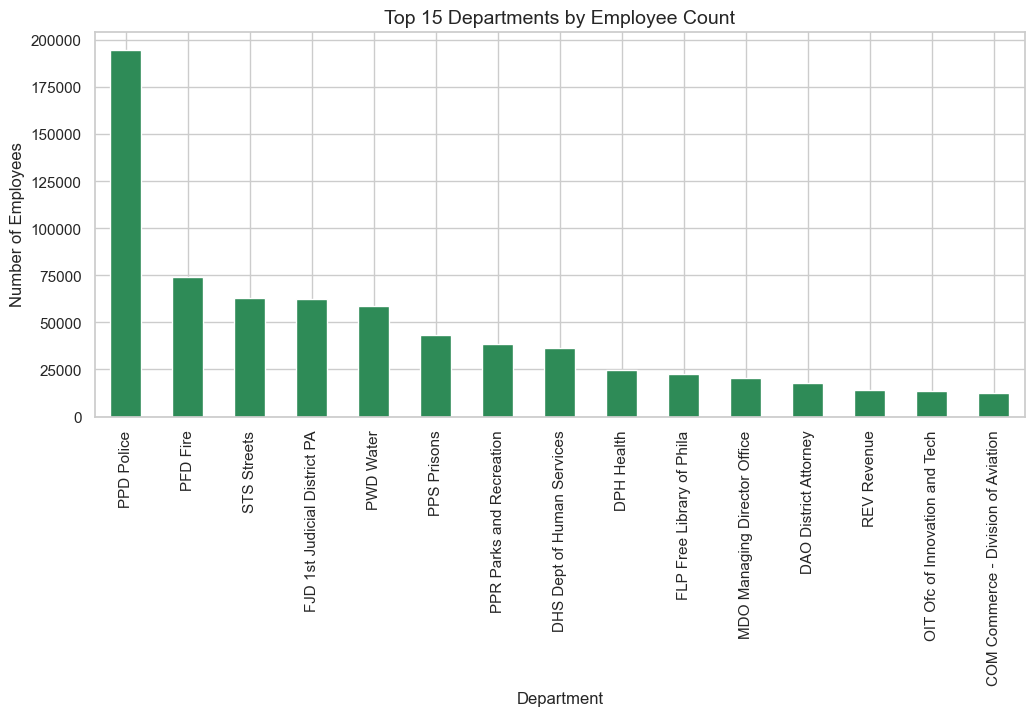

In [ ]:
plt.figure(figsize=(12,5))
df["department_name"].value_counts().head(15).plot(kind="bar", color="seagreen")
plt.title("Top 15 Departments by Employee Count", fontsize=14)
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=90)
plt.show()

Key Insights : The bar chart shows the Top 15 departments with the highest number of employees.
PPD Police has the largest workforce, followed by PFD Fire, STS Streets, and First Judicial District PA.
Overall, public safety and essential city service departments employ the majority of staff.

🎯 **Top 15 Departments by Total Quarter-to-Date (QTD) Earnings**

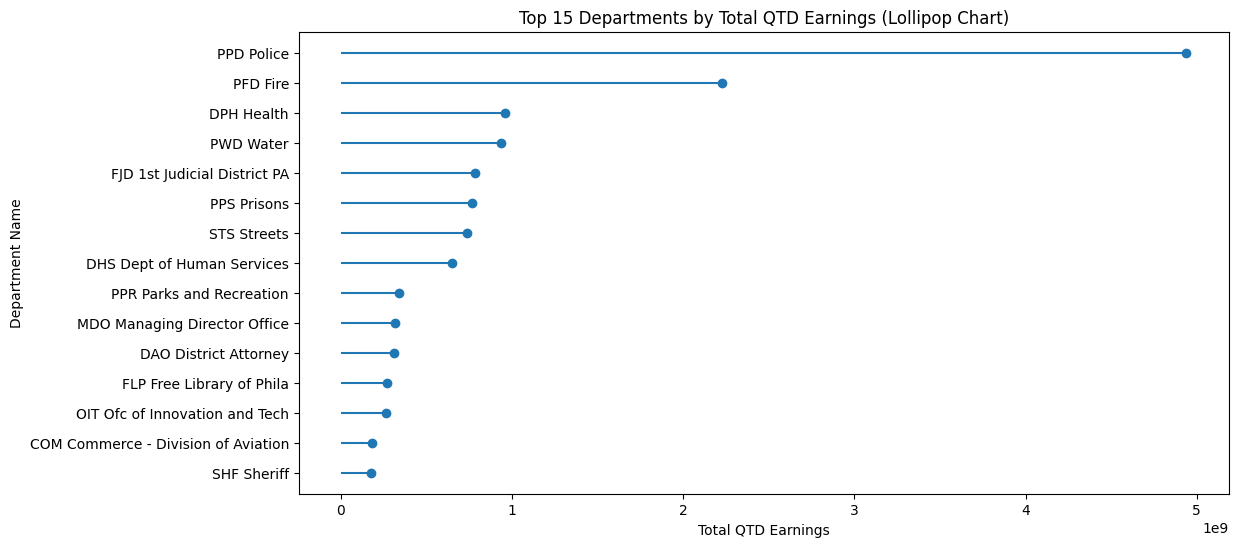

In [ ]:
# Top 15 departments by total_qtd_earning
df_dep = df.groupby("department_name")["total_qtd_earning"].sum().nlargest(15).sort_values()

plt.figure(figsize=(12, 6))
plt.hlines(df_dep.index, xmin=0, xmax=df_dep.values)
plt.plot(df_dep.values, df_dep.index, 'o')
plt.title("Top 15 Departments by Total QTD Earnings (Lollipop Chart)")
plt.xlabel("Total QTD Earnings")
plt.ylabel("Department Name")
plt.show()


Key Insights :
* PPD Police leads by a wide margin with the highest QTD earnings, far exceeding all other departments.

* PFD Fire follows in second place, though still significantly lower than the police department.

* Departments like DPH Health, PWD Water, and FJD 1st Judicial District form the mid-tier.
* Lower-earning departments include Sheriff, Aviation, and Innovation & Tech, which appear at the bottom of the ranking.

* Overall, the chart shows a strong earnings concentration in public safety and essential services.

🎯 **Active vs Inactive Employees Distribution**

Donut Chart : Donut chart shows the proportion of employees who are currently active versus inactive. It is a modified pie chart with a hollow center, making it easier to visualize the distribution in a clean and modern format.

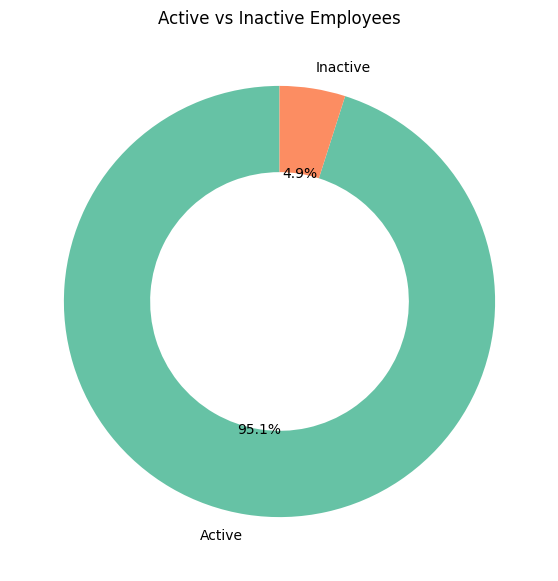

In [ ]:
# Count values
status_counts = df["active_status"].value_counts()
colors = plt.cm.Set2(range(len(status_counts)))

# Plot Donut Chart
plt.figure(figsize=(7,7))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={'width':0.4})

plt.title("Active vs Inactive Employees")
plt.show()

Key Insights : The Donut chart shows the distribution of employees based on their status. Active employees make up about 95%, while Inactive employees account for only around 5%. This indicates that the vast majority of the workforce is currently active.

🎯 **Year-Wise Total Salary Trend Analysis**

Line Chart – A line chart is used to show how a value changes over time. In this analysis, the line helps identify trends, increases, or decreases across different years. By connecting data points with a continuous line, it becomes easier to observe long-term patterns, fluctuations, and overall movement in the salary values over time. This chart is especially useful for understanding trends and making year-to-year comparisons.

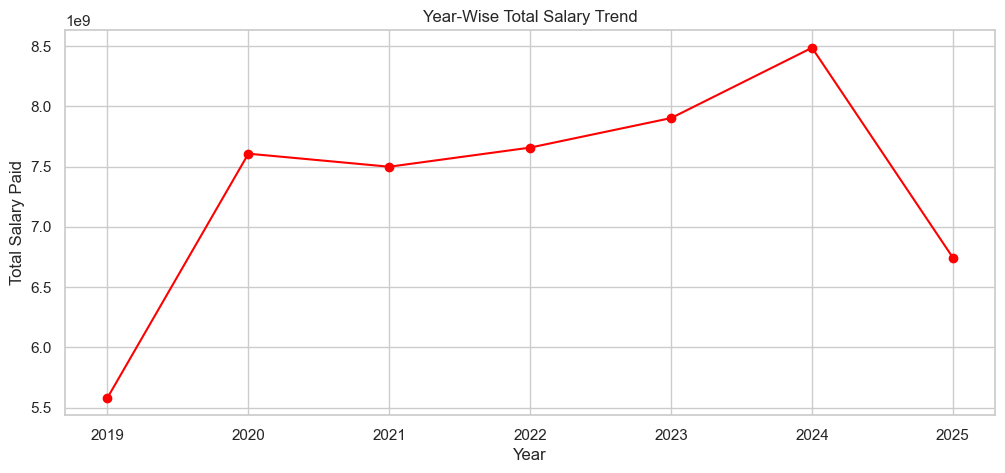

In [ ]:
year_salary = df.groupby("calendar_year")["base_salary"].sum()
plt.figure(figsize=(12,5))
plt.plot(year_salary.index, year_salary.values, marker='o',color="red")
plt.title("Year-Wise Total Salary Trend")
plt.xlabel("Year")
plt.ylabel("Total Salary Paid")
plt.grid(True)
plt.show()

Key Insights : The line chart shows how the total salary paid to employees changes across years.
There is a steady upward trend from 2019 to 2024, indicating increasing payroll expenses—possibly due to salary hikes, additional hiring, or overtime payments.
In 2025, the total salary drops, which may reflect partial-year data, reduced staffing, or budget adjustments.

🎯 **Analysis of the Top 10 Positions by Average Yearly Earnings**

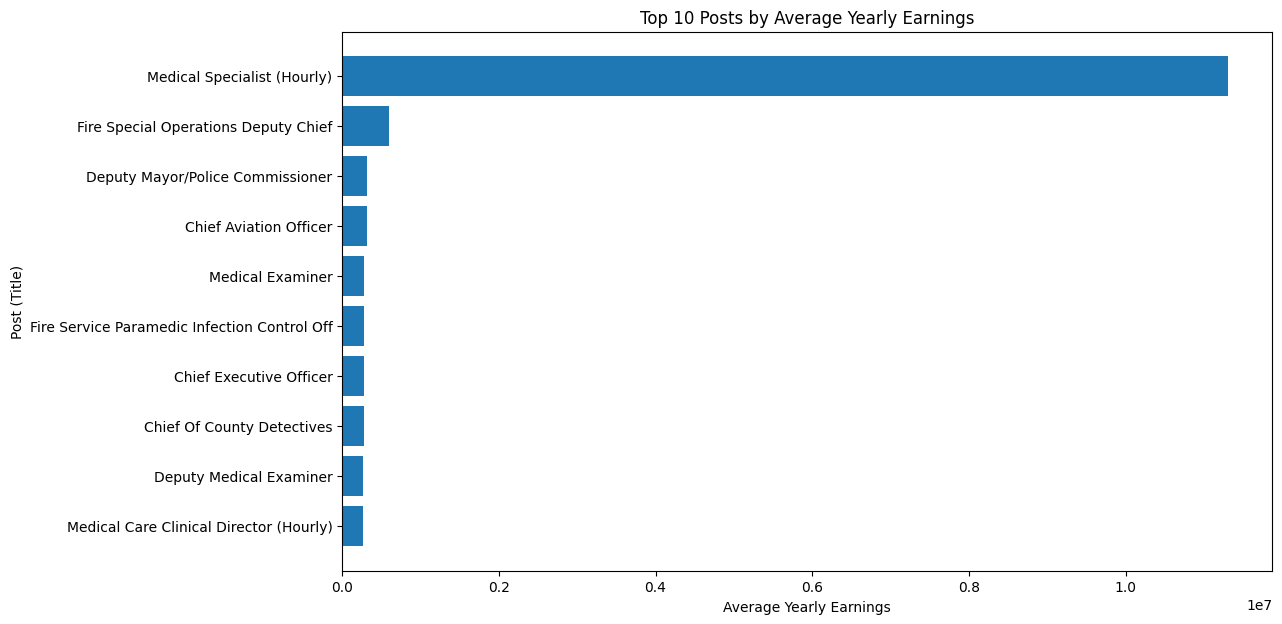

In [ ]:
# Top 10 Titles by average yearly earnings
df_top10 = df.groupby("title")["yearly_earning"].mean().nlargest(10).sort_values()

plt.figure(figsize=(12, 7))
plt.barh(df_top10.index, df_top10.values)
plt.title("Top 10 Posts by Average Yearly Earnings")
plt.xlabel("Average Yearly Earnings")
plt.ylabel("Post (Title)")
plt.show()


Key Insights : The chart displays the top ten positions based on their average yearly earnings. The Medical Specialist (Hourly) position stands out with earnings far higher than all other roles, creating a clear pay gap. The remaining positions, including the Fire Special Operations Deputy Chief and Deputy Mayor/Police Commissioner, show much lower but relatively similar earnings. Overall, the chart highlights a significant difference in compensation between the highest-earning role and the rest.

🎯 **Comparison of Salary and Overtime Gross Pay**

Scatter Plot – A scatter plot is used to visualize the relationship between two continuous variables by displaying individual data points as dots. This chart helps identify patterns such as positive or negative correlation, clustering of points, or any unusual outliers. Overall, it provides a clear view of how strongly the two variables are related and whether one tends to increase or decrease with the other.

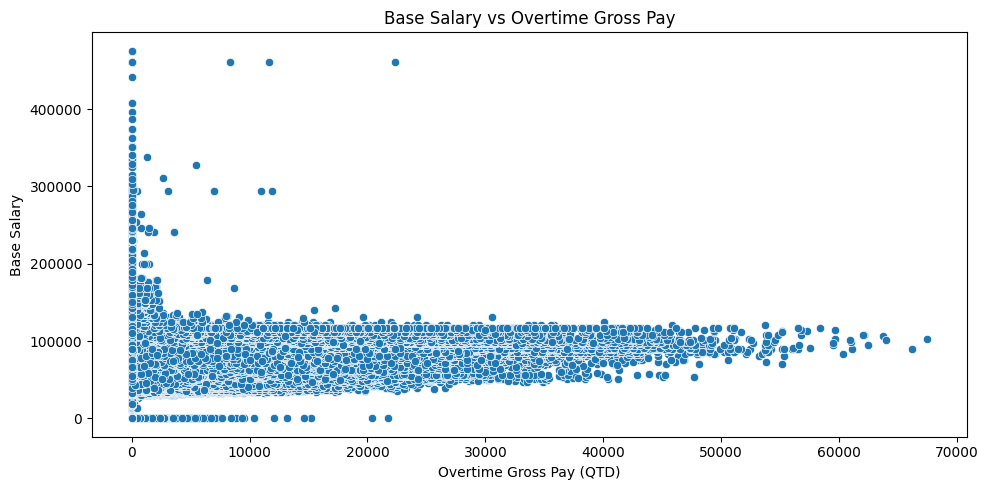

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=df,
    x="overtime_gross_pay_qtd",
    y="base_salary")

plt.title("Base Salary vs Overtime Gross Pay")
plt.xlabel("Overtime Gross Pay (QTD)")
plt.ylabel("Base Salary")
plt.tight_layout()
plt.show()

Key Insights : The scatter plot shows the relationship between base salary and overtime percentage, categorized by earning levels (Low, Medium, High).
Most employees with lower base salaries show higher variation in overtime percentage, while higher-salary employees generally record lower overtime percentages, indicating less dependence on overtime pay.
This visualization helps identify earning patterns and workload distribution across different salary brackets.

🎯 **Overtime Gross Pay Trends (2019–2025)**

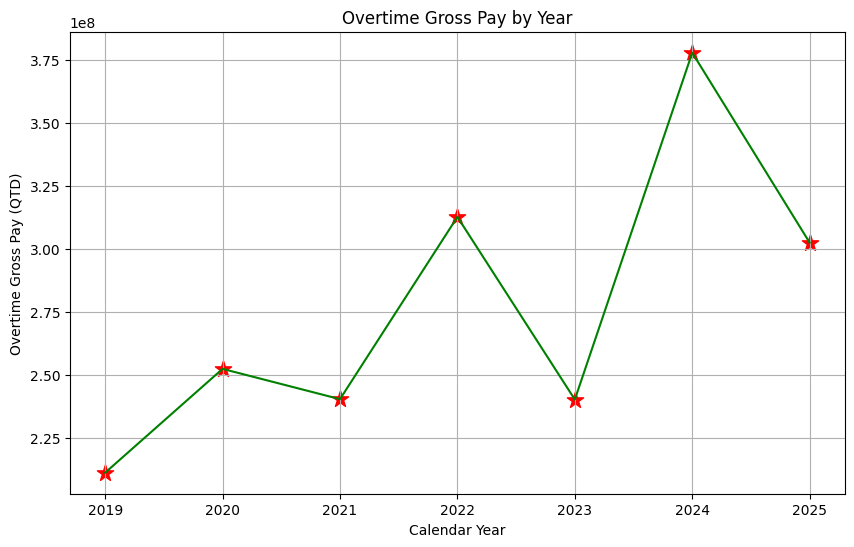

In [ ]:
df_year = df.groupby("calendar_year")["overtime_gross_pay_qtd"].sum()

plt.figure(figsize=(10,6))

# Line in green
plt.plot(df_year.index, df_year.values, color="green")

# Star markers in red
plt.scatter(df_year.index, df_year.values, marker='*', color="red", s=150)

plt.title("Overtime Gross Pay by Year")
plt.xlabel("Calendar Year")
plt.ylabel("Overtime Gross Pay (QTD)")
plt.grid(True)
plt.show()


Key Insights :
* Overtime pay shows a general upward trend, with noticeable fluctuations year to year.

* 2024 marks the highest spike, reaching its peak overtime spending.

* Decline occurred in 2021 and 2023, indicating temporary reductions in overtime needs or costs.

* 2025 shows a decline from the 2024 peak but remains higher than most previous years, suggesting sustained elevated overtime usage.

🎯 **Longevity Gross Pay (QTD) – Yearly Total Summary**

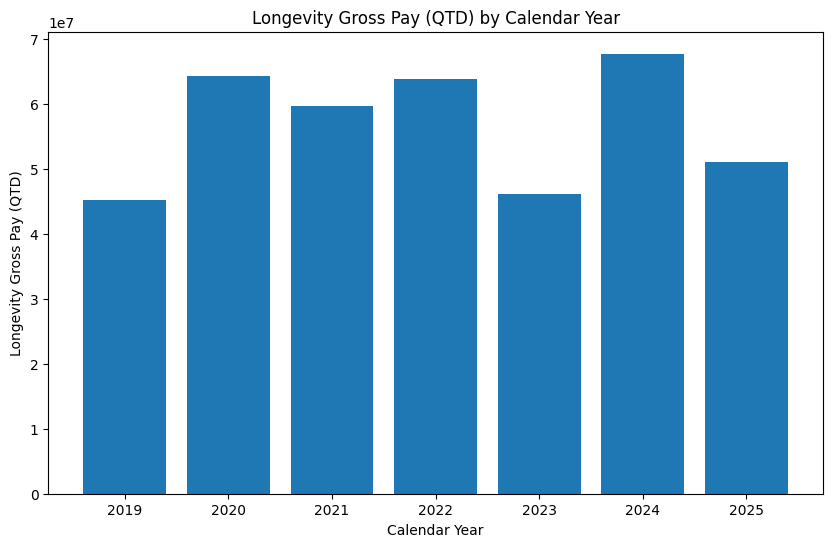

In [ ]:
df_year = df.groupby("calendar_year")["longevity_gross_pay_qtd"].sum()

plt.figure(figsize=(10,6))
plt.bar(df_year.index, df_year.values)
plt.title("Longevity Gross Pay (QTD) by Calendar Year")
plt.xlabel("Calendar Year")
plt.ylabel("Longevity Gross Pay (QTD)")
plt.show()


Key Insights :
* The graph shows how much total longevity pay was given each year.

* 2020, 2022, and 2024 have the highest totals, meaning more longevity pay was paid out in those years.

* 2019 and 2023 show the lowest totals compared to the other years.

* 2025 is in the middle — not the highest, not the lowest.

* Overall, the totals go up and down slightly each year, but 2024 clearly stands out as the year with the highest longevity gross pay.

🎯 **Post-Separation Compensation Analysis: Top 10 Departments (QTD)**

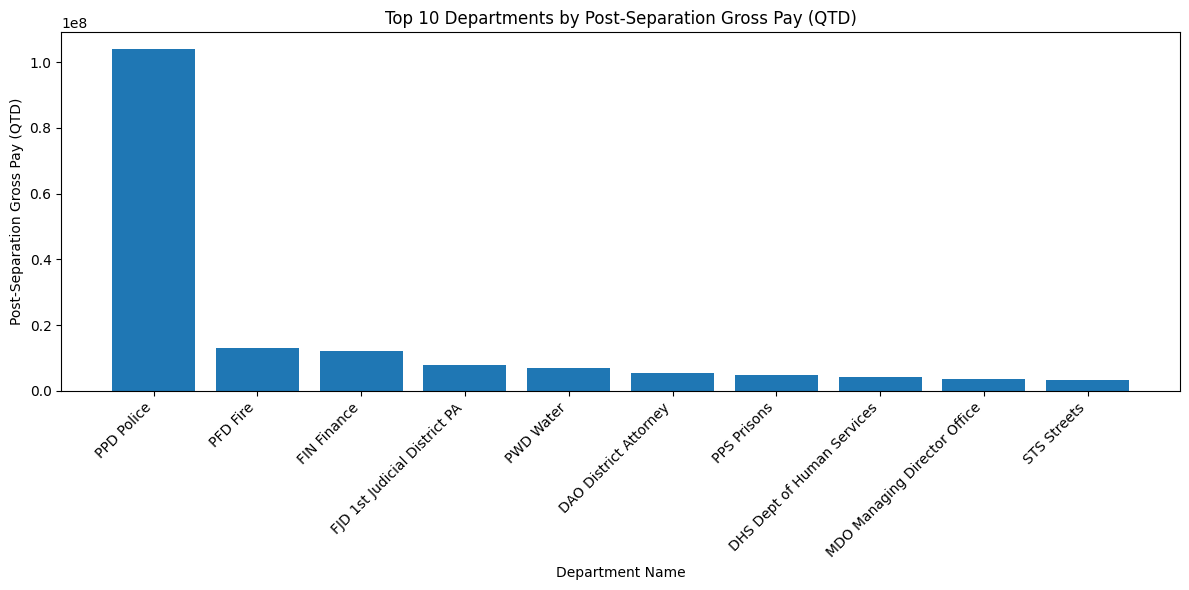

In [ ]:
# Group by department
df_dep = df.groupby("department_name")["post_separation_gross_pay_qtd"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(df_dep.index, df_dep.values)

plt.title("Top 10 Departments by Post-Separation Gross Pay (QTD)")
plt.xlabel("Department Name")
plt.ylabel("Post-Separation Gross Pay (QTD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Key Insights : The chart shows that PPD Police overwhelmingly leads all departments in post-separation gross pay, far surpassing every other unit—indicating a large volume of retirements, benefit payouts, or lump-sum settlements within the quarter. PFD Fire and FIN Finance follow at a distant second and third, showing moderately high separation-related costs. All remaining departments, including Judicial District, Water, District Attorney, and Human Services, contribute comparatively small amounts, highlighting that separation-related payouts are highly concentrated in a few major public safety and administrative departments.

🎯 **Quarter-to-Date Earnings Composition by Department — Stacked Breakdown**

A heat-map for QTD earning types would quickly show which departments have the highest concentration of overtime, longevity, post-separation, or miscellaneous earnings.

<Figure size 1200x700 with 0 Axes>

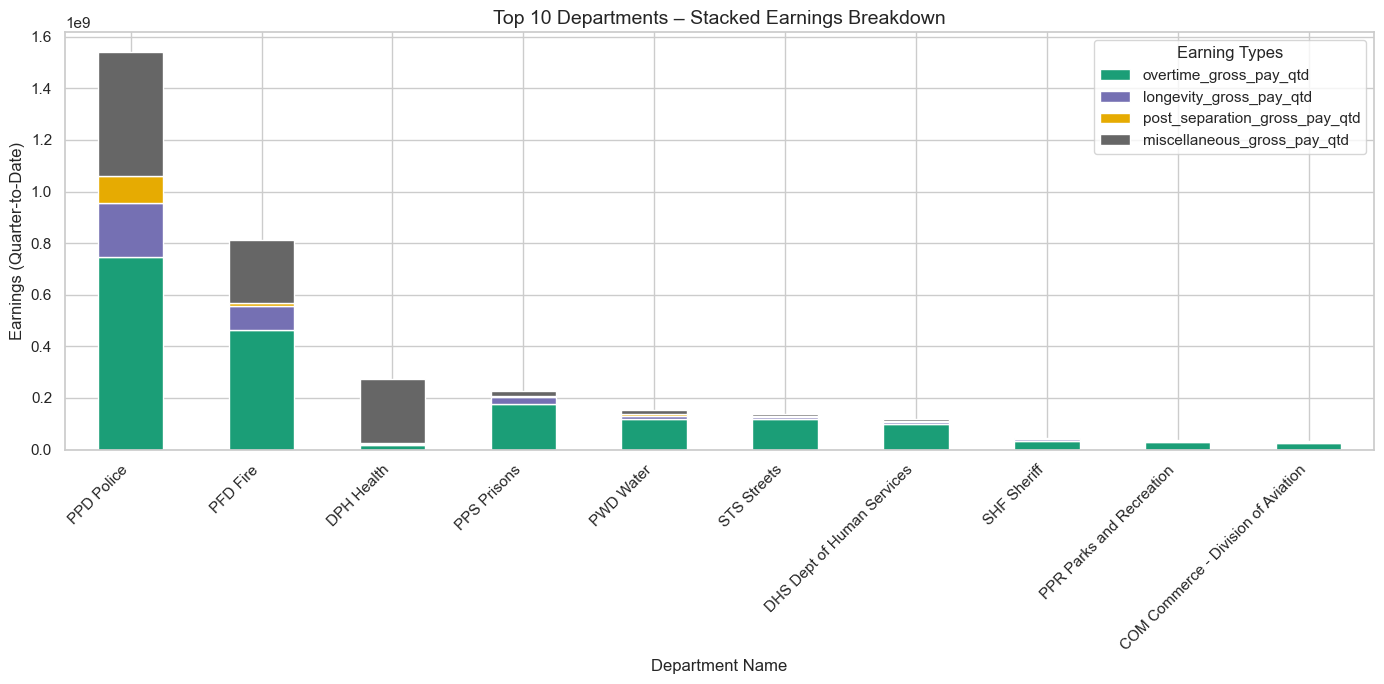

In [ ]:
# Columns used for stacking
cols = [
    "overtime_gross_pay_qtd",
    "longevity_gross_pay_qtd",
    "post_separation_gross_pay_qtd",
    "miscellaneous_gross_pay_qtd"]

# Filter rows where ANY of these earnings > 0
df_filtered = df[df[cols].sum(axis=1) > 0]

# Group by department and sum earnings
dept_sum = df_filtered.groupby("department_name")[cols].sum()

# Take Top 10 departments with highest total earnings
dept_sum["total"] = dept_sum.sum(axis=1)
dept_top10 = dept_sum.sort_values("total", ascending=False).head(10)
dept_top10 = dept_top10.drop(columns="total")

# Plot
plt.figure(figsize=(12,7))
dept_top10.plot(
    kind="bar",
    stacked=True,
    figsize=(14,7),
    colormap="Dark2")

plt.title("Top 10 Departments – Stacked Earnings Breakdown", fontsize=14)
plt.xlabel("Department Name")
plt.ylabel("Earnings (Quarter-to-Date)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Earning Types")
plt.tight_layout()
plt.show()


Key Insights : The chart clearly shows that PPD Police and PFD Fire dominate total earnings, driven largely by extremely high overtime and significant miscellaneous and longevity components. Police also show notable post-separation payouts, indicating major retirement or separation activity. Departments like DPH Health, PPS Prisons, and PWD Water contribute mid-level totals with moderate overtime and miscellaneous earnings. All remaining departments—such as STS Streets, Human Services, Sheriff, and Commerce—show relatively low earning volumes, with compensation structures that rely far less on overtime and special earning categories.

 🎯 **Base Salary by Earning Category**

Box Plot : Box plot compares base salaries across five earning categories: Very Low, Low, Medium, High, and Very High. Each category shows the distribution of salaries using median, quartiles, and outliers. As the earning category increases, the median salary and overall spread clearly rise. Very High earners show the largest range and the highest number of extreme outliers. In contrast, Very Low and Low categories have lower medians and smaller spreads, indicating limited salary variation.

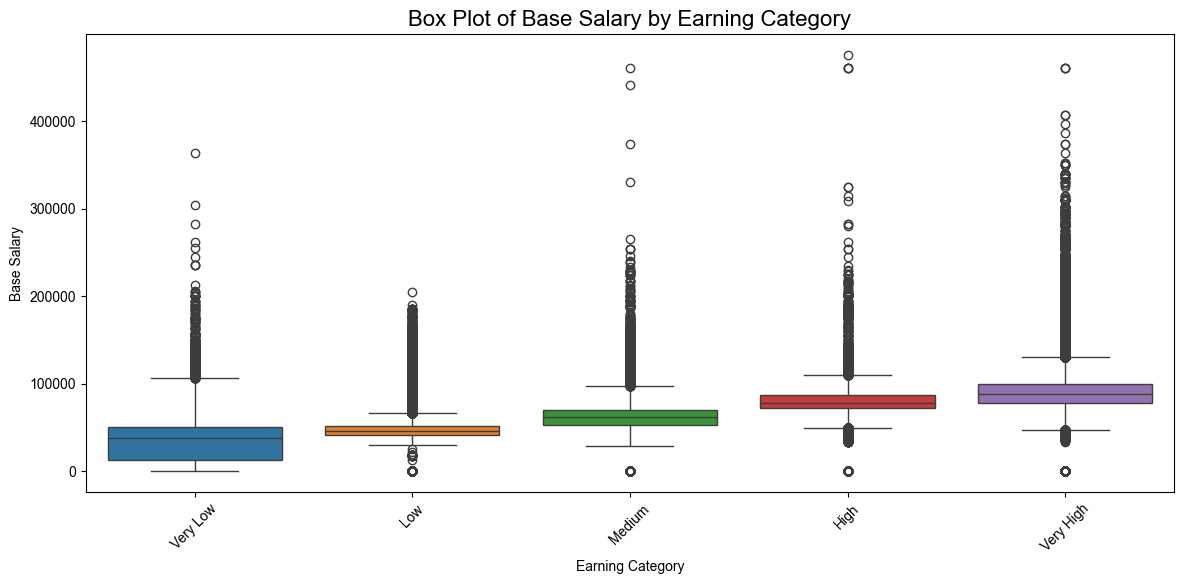

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='earning_category',
    y='base_salary',
    hue='earning_category',
    legend=False,
    showfliers=True)
sns.set(style="whitegrid")
plt.title('Box Plot of Base Salary by Earning Category', fontsize=16)
plt.xlabel('Earning Category')
plt.ylabel('Base Salary')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Insights :
* Salary increases consistently from Very Low to Very High categories.

* Higher earning groups show wider variability and more outliers.

* Lower categories have tightly packed salary ranges, indicating uniform pay levels.

* Very High category displays several extreme salary values, showing a significant gap between typical and top earners.

🎯 **Compensation Overview: Average Base Salary & Additional Earnings (Top 10 Departments)**

Sub Plot : A heat-map comparing average base salary and average additional earnings across departments would quickly highlight compensation intensity.
Darker cells would indicate departments with higher total pay, helping identify units where salary structures or overtime-driven earnings are significantly above the group norm.

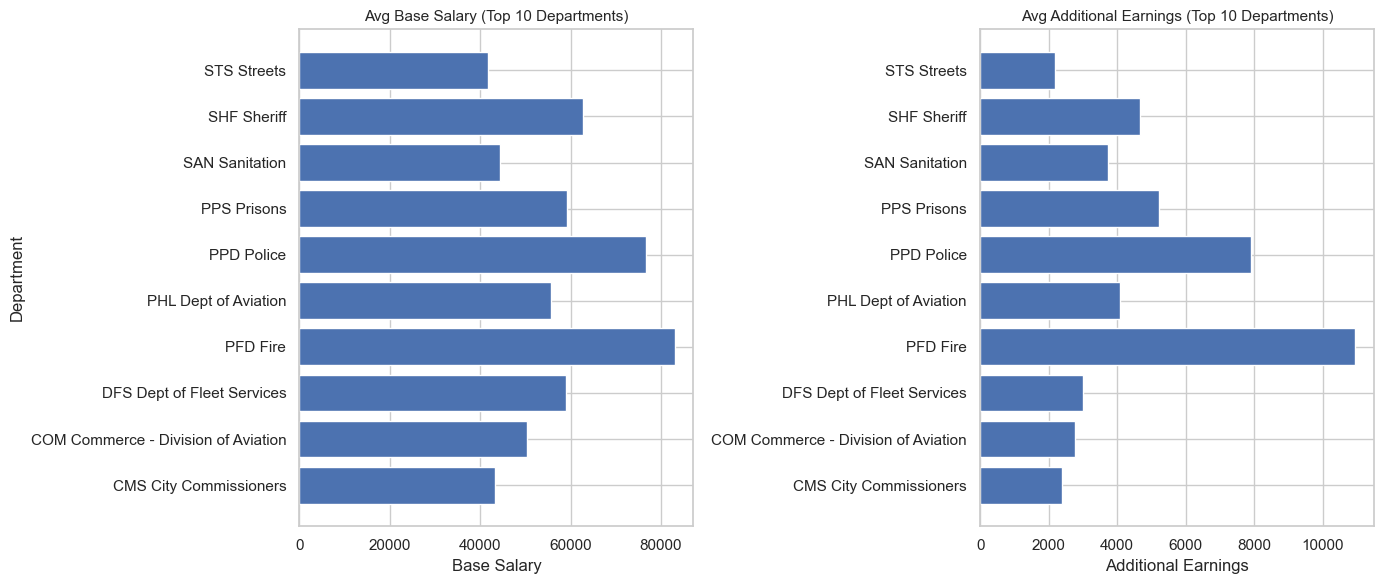

In [ ]:
# Compute Top 10 Departments by Overtime %
top10_dept = (
    df.groupby("department_name")["overtime_percentage"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .index)

df_top10 = df[df["department_name"].isin(top10_dept)]

# Prepare aggregated data
agg_df = df_top10.groupby("department_name").agg({
    "base_salary": "mean",
    "additional_earnings_qtd": "mean"}).reset_index()

# Create Subplots
plt.figure(figsize=(14,6))

# Plot 1: Base Salary
plt.subplot(1, 2, 1)
plt.barh(agg_df["department_name"], agg_df["base_salary"])
plt.title("Avg Base Salary (Top 10 Departments)", fontsize=11)
plt.xlabel("Base Salary")
plt.ylabel("Department")

# Plot 2: Additional Earnings
plt.subplot(1, 2, 2)
plt.barh(agg_df["department_name"], agg_df["additional_earnings_qtd"])
plt.title("Avg Additional Earnings (Top 10 Departments)", fontsize=11)
plt.xlabel("Additional Earnings")

plt.tight_layout()
plt.show()


Key Insights :
* The two charts show clear compensation patterns across the top departments.
 * Public safety units—especially PFD Fire, PPD Police, and PPS Prisons—consistently stand out with higher average base salaries and significantly elevated additional earnings, reflecting overtime-heavy operational demands.
 * Fire employees in particular receive the highest combined compensation, driven largely by substantial extra-duty pay.
 * Departments like PHL Dept of Aviation and DFS Fleet Services maintain mid-range salaries and moderate additional earnings, indicating more stable workload patterns.
 * Administrative and infrastructure units such as CMS City Commissioners, COM Commerce, and STS Streets show comparatively lower base salaries and minimal additional earnings, suggesting fewer overtime requirements and narrower compensation variability across employees.

🎯 **Correlation Heatmap of Salary and Earnings Components**

Heatmap – The correlation heatmap visualizes how different earnings-related variables are related to each other. Darker colors indicate stronger correlations, while lighter ones show weaker relationships. Positive correlations suggest that two variables increase together, whereas low or near-zero values indicate little to no linear relationship.

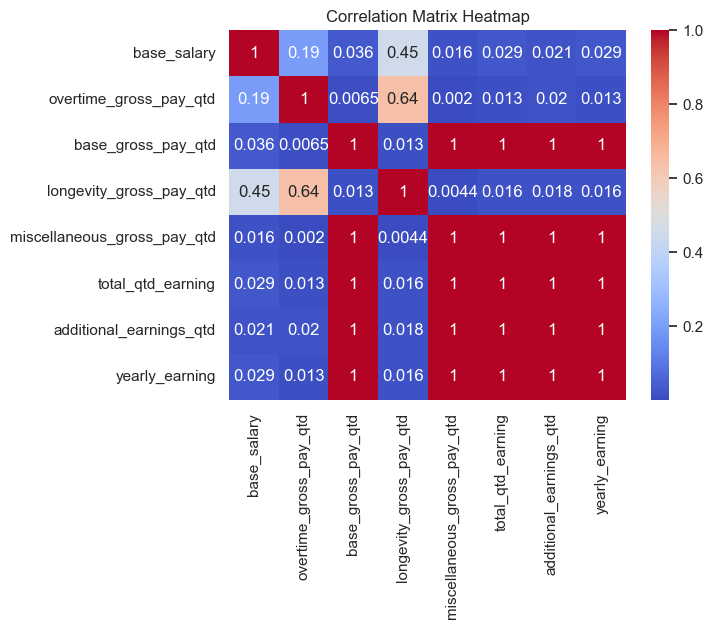

In [ ]:
numeric_df = df[['base_salary','overtime_gross_pay_qtd','base_gross_pay_qtd','longevity_gross_pay_qtd','miscellaneous_gross_pay_qtd','total_qtd_earning','additional_earnings_qtd','yearly_earning' ]]
corr = numeric_df.corr()
sns.heatmap(corr,annot=True, cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

Key Insights :
* Overtime gross pay and longevity pay show a moderate positive correlation, meaning employees with higher longevity tend to earn more overtime pay.

* Most other earnings components have very weak correlations, indicating that salary and additional pay types do not strongly influence each other.

* Yearly earnings, total QTD earnings, and miscellaneous earnings show artificially high correlations because they may be cumulative or derived variables.

🎯 **Quarterly Earnings Component Comparison by Employee Category**

<Figure size 1000x500 with 0 Axes>

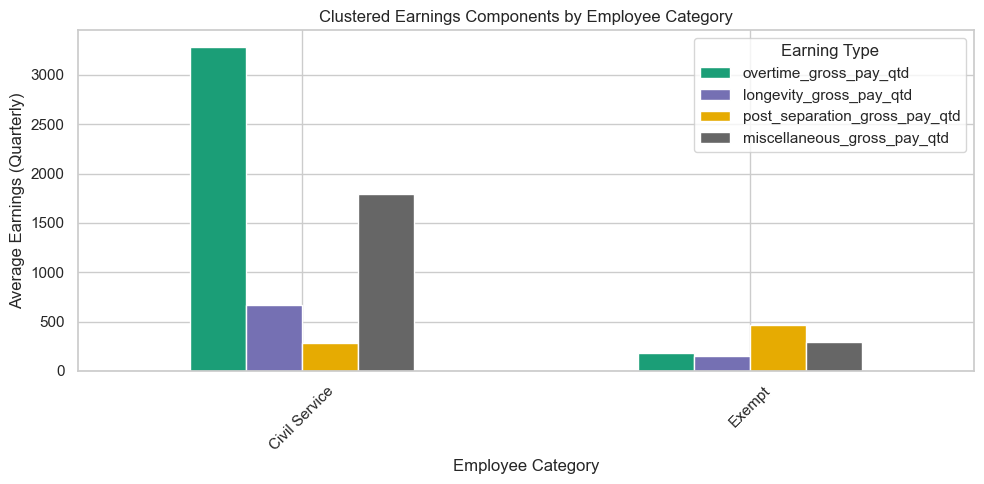

In [ ]:
# Earnings columns
earn_cols = [
    "overtime_gross_pay_qtd",
    "longevity_gross_pay_qtd",
    "post_separation_gross_pay_qtd",
    "miscellaneous_gross_pay_qtd"]

# Filter rows where at least one earnings column > 0
df_filtered = df[df[earn_cols].sum(axis=1) > 0]

# Group by employee category
cat_group = df_filtered.groupby("employee_category")[earn_cols].mean()

# Plot
plt.figure(figsize=(10,5))
cat_group.plot(kind="bar", figsize=(10,5),colormap="Dark2" )

plt.title("Clustered Earnings Components by Employee Category", fontsize=12)
plt.xlabel("Employee Category")
plt.ylabel("Average Earnings (Quarterly)")
plt.legend(title="Earning Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Insights :
* Civil Service employees earn much higher overtime, longevity, and miscellaneous pay, showing their heavy involvement in operational work.
* Exempt employees — such as managers, analysts, HR staff, IT professionals, attorneys, and department directors — earn less overtime but show higher post-separation pay, reflecting their salaried, non-overtime roles.

# Overall Findings:

1. The analysis shows significant variation in earnings across departments and job titles, with specific roles consistently receiving higher total QTD earnings.

2. Overtime pay contributes noticeably to overall earnings for several operational departments, indicating workload intensity and staff demand.

3. Longevity, separation, and miscellaneous pay components remain minimal for most employees, suggesting these benefits apply only to selected roles or situations.

4. Earnings distribution across employee categories is uneven, with certain categories showing a strong association with higher compensation structures.

5. The top-earning departments and titles display clear patterns of high base salary combined with substantial additional earnings, reflecting role complexity and responsibility levels.

# ◆ **Conclusion and Recommendations**

# Conclusion

The analysis of employee earnings, salary structure, and overtime patterns provides a comprehensive understanding of compensation dynamics across departments and job titles. The results highlight substantial variation in total QTD earnings, driven primarily by base salary, overtime contributions, longevity pay, and other additional components. High-earning titles are concentrated in specialized or high-responsibility roles, reflecting the nature of work and departmental requirements. The visualizations—including scatter plots, boxplots, and lollipop charts—clearly show income disparities and the influence of supplemental earnings on total compensation. Overall, the findings offer meaningful insights into workforce remuneration patterns and help identify the roles and departments with significant pay differentials.

# Data-Driven Recommendations

1. **Enhance Data Quality Monitoring:**
Establish a structured data-validation process to identify missing, inconsistent, or anomalous values early, ensuring greater accuracy in salary-related insights.

2. **Implement Department-Level Performance Reviews:**
Use the earnings and overtime patterns to evaluate workload distribution across departments and adjust staffing or resource allocation where necessary.

3. **Optimize Overtime Management:**
Departments with consistently high overtime percentages should undergo workload audits, and corrective actions such as scheduling adjustments or additional staffing should be introduced.

4. **Strengthen Compensation Structure Analysis:**
Regularly compare base salary, overtime, longevity pay, and miscellaneous earnings to ensure fair compensation practices and to identify roles requiring pay-scale updates.

5. **Use Data-Driven HR Decisions:**
Compensation insights should guide recruitment, promotion, and budget allocation to maintain equity and operational effectiveness.